<img src="escudo_utfsm.gif" style="float:right;height:100px">
<img src="IsotipoDIisocolor.png" style="float:left;height:100px">
<center>
    <h1> ILI285/INF285 Computación Científica </h1>
    <h1> Tarea N°1: Introducción a Jupyter Notebook </h1>
    <h3> [S]cientific [C]omputing [T]eam 2018</h3>
</center>

<p>
<center>_Marzo 2018_ </center>
</p>

In [193]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
import time

## Introducción

El objetivo de este laboratorio es familiarizarse con la herramienta Jupyter notebook, esta es una plataforma web que permite crear y compartir documentos que contienen código fuente, ecuaciones, visualizaciones y texto explicativo.
El lenguaje de programación a utilizar será Python, es una buena alternativa debido a que Python posee muchos modulos especializados en algebra lineal, metodos numericos, vizualizcción de datos,etc. 

## Pregunta 1 [20 Pts]

1) Una farmacia vende 10 frascos de vitamina A, 5 frascos de vitamina C y 25 frascos de vitamina D, todo por un valor de 355 pesos. Además, vende 20 frascos de vitamina A, 10 de vitamina C y 10 de vitamina D por un total de 310 pesos. Por otra parte vende 12 frascos de vitamina A, 4 de vitamina C y 15 de vitamina D por un total de 266 pesos. Encuentra el costo correspondiente a cada frasco de las vitaminas A, C y D.

In [194]:
a = np.array([[10,5,25],[20,10,10],[12,4,15]])
b = np.array([355,310,266])
x = linalg.solve(a,b)
print("Costo Vitamina A: %s" % (int(x[0])))
print("Costo Vitamina C: %s" % (int(x[1])))
print("Costo Vitamina D: %s" % (int(x[2])))

Costo Vitamina A: 7
Costo Vitamina C: 5
Costo Vitamina D: 10


2) Se tiene el siguiente sistema de ecuaciones:

\begin{align}
6x_1 - 5x_2 - 7x_3 - 4x_4 + 3x_5 + 8x_6 &= -44 \\
-7x_1 + 4x_2 + 7x_3 + 1x_4 - 3x_5 + 8x_6 &= 8 \\
6x_1 - 3x_2 + 7x_3 - 6x_4 + 5x_5 - 6x_6 &= 104 \\
8x_1 - 5x_2 + 7x_3 + x_4 - 6x_5 + 4x_6 &= 44\\
2x_1 + 8x_2 + 6x_3 + 2x_4 - 8x_5 + 3x_6 &= -47\\
-2x_1 + 4x_2 + 5x_3 + 7x_4 - 6x_5 - 5x_6 &= 6
\end{align}

Represente ambos problemas como un sistema matricial, es decir de la forma $A\mathbf{x}$ = $ \mathbf{b}$ , luego encuentre los valores del vector $\mathbf{x}$: 
* Usando la función *solve* de SciPy [[1]](#bib).
* Haciendo uso de la inversa de A y el vector $\mathbf{b}$. ($\mathbf{x} = A^{-1} \mathbf{b}$).

Además, calcule el tiempo que demoran los dos métodos anteriores.

In [195]:
%timeit
a = np.array([[6,-5,-7,-4,3,8],[-7,4,7,1,-3,8],[6,-3,7,-6,5,-6],[8,-5,7,1,-6,4],[2,8,6,2,-8,3],[-2,4,5,7,-6,-5]])
b = np.array([-44,8,104,44,-47,6])
x = linalg.solve(a,b)
x

array([-2., -7.,  8., -1.,  3., -3.])

In [196]:
%timeit
a = np.array([[6,-5,-7,-4,3,8],[-7,4,7,1,-3,8],[6,-3,7,-6,5,-6],[8,-5,7,1,-6,4],[2,8,6,2,-8,3],[-2,4,5,7,-6,-5]])
b = np.array([-44,8,104,44,-47,6])
linalg.inv(a).dot(b)

array([-2., -7.,  8., -1.,  3., -3.])

## Pregunta 2 [30 Pts]

La matriz de Hilbert es una matriz cuadrada que cuenta con la siguiente forma:

$$
H_{i,j} = \frac{1}{i+j-1}, i,j = 1\ldots n
$$

Construya la función *Hilbert(n)*, mediante la siguiente estructura:

```python
'''
n - (integer) Matrix size
H - (2D-array) Hilbert matrix
x - (1D-array) Random vector x
b - (1D-array) Vector result of Ax
'''
```
```python     
def Hilbert(n):
    ...
    return H, x, b
```

Esta función deberá retornar matrices de Hilbert, vectores $\mathbf{x}$ de forma aleatoria (recuerde elegir una semilla para poder reproducir sus experimentos) y un vector $\mathbf{b}$ construido a partir de $A\mathbf{x} = \mathbf{b}$. Se deberá mostrar a través de un gráfico los tiempos de resolución de cada método (usando la función *solve* de SciPy y resolviendo directamente $\mathbf{x} = A^{-1} \mathbf{b}$) para matrices de tamaño 10, 100, 300, 500, 700, 1000, 1300. Calcule el error de sus dos métodos con respecto al vector $\mathbf{x}$ creado anteriormente y grafique el tamaño de la matriz vs el error. Concluya.

Para los gráficos de tiempo, ocupe la función *loglog*, y para los de error *semilogy* [[2]](#bib).

In [197]:
from scipy.linalg import hilbert
from sklearn.metrics import mean_squared_error as mse
import random
import time

def Hilbert(n):
    np.random.seed(44)
    H = hilbert(n)
    x = np.random.rand(n)
    b = np.dot(H,x)
    return H,x,b


def calcularX(metodo):
    the_list = [10,100, 300, 500, 700, 1000, 1300]
    time_list = []
    error_list = []
    for i in the_list:
        start = time.clock()
        H,x,b = Hilbert(i)
        if(metodo == 1):
            new_x = linalg.solve(H,b)
        elif(metodo == 2):
            new_x = linalg.inv(H).dot(b)
        end = time.clock()
        time_list.append(end-start)
        error_list.append(mse(x,new_x))
    return time_list, error_list

        
tiempo1,error1 = calcularX(1)
tiempo2,error2 = calcularX(2)

/home/gabo/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning:

scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.279889739544296e-21 / 1.1102230246251565e-16

/home/gabo/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning:

scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.739638459522049e-21 / 1.1102230246251565e-16

/home/gabo/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning:

scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.894135436986915e-21 / 1.1102230246251565e-16

/home/gabo/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning:

scipy.linalg.solve
Ill-conditioned matrix detected. 

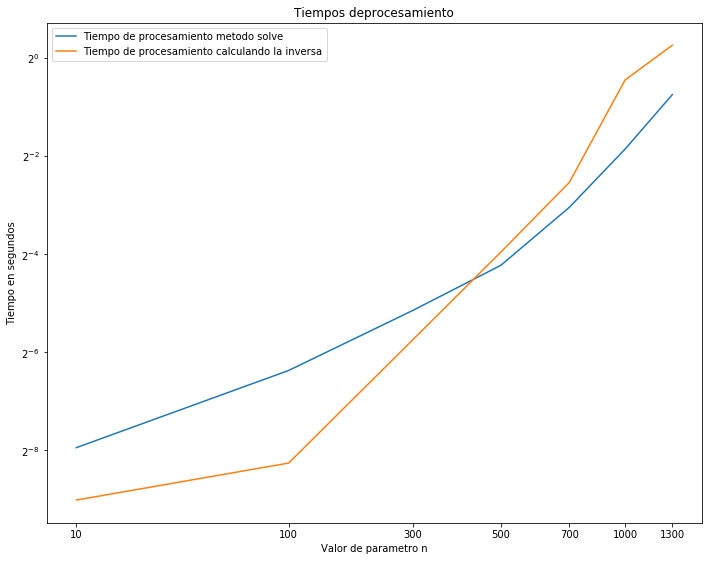

In [198]:
Cs = [10,100, 300, 500, 700, 1000, 1300]
pasos = [1,2,3,4,5,6,7]

plt.figure(figsize=(10,15))
plot = plt.subplot(2,1,1)
plot.loglog(pasos, tiempo1, label='Tiempo de procesamiento metodo solve',basex = 2,basey=2)
plot.loglog(pasos, tiempo2, label='Tiempo de procesamiento calculando la inversa',basex = 2,basey=2)
plt.legend()
plt.title('Tiempos deprocesamiento')
plt.xlabel('Valor de parametro n')
plt.ylabel('Tiempo en segundos')
plt.xticks(pasos, Cs)
plt.tight_layout()
plt.show()

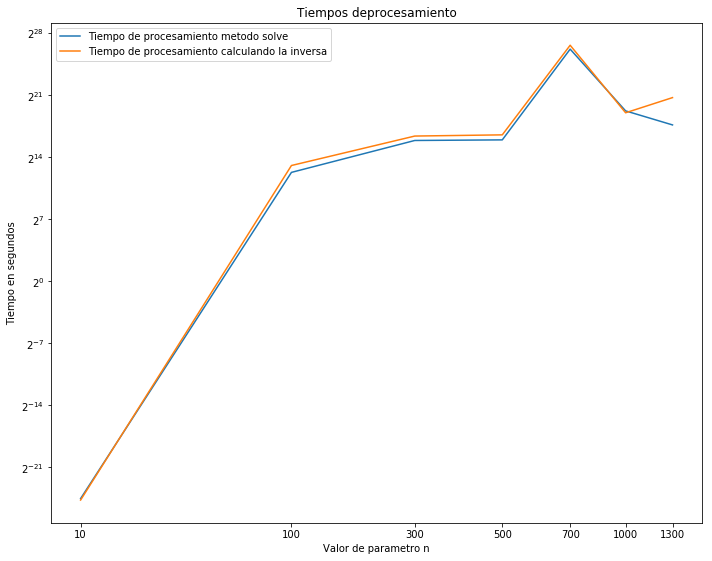

In [199]:
Cs = [10,100, 300, 500, 700, 1000, 1300]
pasos = [1,2,3,4,5,6,7]

plt.figure(figsize=(10,15))
plot = plt.subplot(2,1,1)
plot.loglog(pasos, error1, label='Tiempo de procesamiento metodo solve',basex = 2,basey=2)
plot.loglog(pasos, error2, label='Tiempo de procesamiento calculando la inversa',basex = 2,basey=2)
plt.legend()
plt.title('Tiempos deprocesamiento')
plt.xlabel('Valor de parametro n')
plt.ylabel('Tiempo en segundos')
plt.xticks(pasos, Cs)
plt.tight_layout()
plt.show()

## Pregunta 3 [40 Pts]

Usando la función *Hilbert(n)* creada anteriormente, repita 50 veces cada método con matrices de tamaño 10, 100, 300, 500, 700, 1000, 1300, y guarde sus tiempos de ejecución. Con esta data, realice un gráfico de *boxplot* [[3]](#bib) de cada método (en total serán 14 *boxplots*), indicando claramente a que método corresponde cada boxplot. Una con una línea las medias de cada método en los boxplots mostrados y concluya.

In [200]:
def pregunta3(R,metodo):
    the_list = [10,100, 300, 500, 700, 1000, 1300]
    time_list = []
    for i in the_list:
        H,x,b = Hilbert(i)
        aux_list = []
        for j in range(R):
            start = time.clock()
            if(metodo == 1):
                new_x = linalg.solve(H,b)
            elif(metodo == 2):
                new_x = linalg.inv(H).dot(b)
            end = time.clock()
            aux_list.append(end-start)
        aux_list.append(metodo)
        aux_list.append(i)
        time_list.append(aux_list)
    return time_list

tiemposM1 = pregunta3(50,1)
tiemposM2 = pregunta3(50,2)

tiemposT = []
for i,j in zip(range(7), range(7)):
    tiemposT.append(tiemposM1[i])
    tiemposT.append(tiemposM2[j])

/home/gabo/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning:

scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.279889739544296e-21 / 1.1102230246251565e-16

/home/gabo/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning:

scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.739638459522049e-21 / 1.1102230246251565e-16

/home/gabo/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning:

scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.894135436986915e-21 / 1.1102230246251565e-16

/home/gabo/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning:

scipy.linalg.solve
Ill-conditioned matrix detected. 

In [201]:
import pandas as pd
df1 = pd.DataFrame(tiemposM1)
df1 = df1.transpose()
df1.columns = ['T10', 'T100','T300', 'T500','T700', 'T1000','T1300']
df1.drop(df1.tail(2).index,inplace=True)
#df.index = ['T10', 'T100','T300', 'T500','T700', 'T1000','T1300']
df2 = pd.DataFrame(tiemposM2)
df2 = df2.transpose()
df2.columns = ['T10', 'T100','T300', 'T500','T700', 'T1000','T1300']
df2.drop(df2.tail(2).index,inplace=True)

dfT = pd.DataFrame(tiemposT)
dfT = dfT.transpose()
dfT.columns = ['T10.1','T10.2',  'T100.1', 'T100.2','T300.1','T300.2', 'T500.1','T500.2','T700.1','T700.2', 'T1000.1','T1000.2','T1300.1','T1300.2']
dfT.drop(dfT.tail(2).index,inplace=True)

dfT

,T10.1,T10.2,T100.1,T100.2,T300.1,T300.2,T500.1,T500.2,T700.1,T700.2,T1000.1,T1000.2,T1300.1,T1300.2
0,0.003158,0.001131,0.003146,0.002467,0.013885,0.022967,0.066661,0.116609,0.110350,0.148210,0.254833,0.388672,0.456294,0.881410
1,0.001139,0.000715,0.003259,0.002340,0.013741,0.057639,0.052551,0.086002,0.108542,0.148547,0.252753,0.391469,0.465641,0.884961
2,0.000936,0.000688,0.002409,0.007969,0.013892,0.026279,0.051778,0.076904,0.103108,0.163595,0.253846,0.390654,0.506562,0.881902
3,0.000893,0.000681,0.002463,0.025995,0.013464,0.022781,0.053223,0.079045,0.125071,0.193552,0.252600,0.390138,0.492384,0.881416
4,0.000887,0.000665,0.002374,0.017132,0.013338,0.016711,0.053254,0.148140,0.116984,0.202054,0.267115,0.390087,0.464049,0.903138
5,0.000883,0.000662,0.002364,0.002574,0.013380,0.026248,0.044753,0.078902,0.135532,0.213899,0.252270,0.390041,0.467039,0.882047
6,0.000880,0.000659,0.002355,0.002369,0.013409,0.023030,0.061278,0.100702,0.130623,0.183480,0.252680,0.391748,0.452215,0.884571
7,0.000874,0.000658,0.002439,0.002436,0.013245,0.026433,0.060684,0.072394,0.166185,0.221803,0.252842,0.389845,0.456416,0.882695
8,0.000865,0.000652,0.002678,0.002337,0.013573,0.022851,0.058822,0.128026,0.120539,0.177372,0.252853,0.389963,0.456794,0.881015
9,0.000874,0.000658,0.002425,0.017787,0.013500,0.016833,0.061919,0.080285,0.122360,0.196220,0.252809,0.391068,0.497219,0.881813


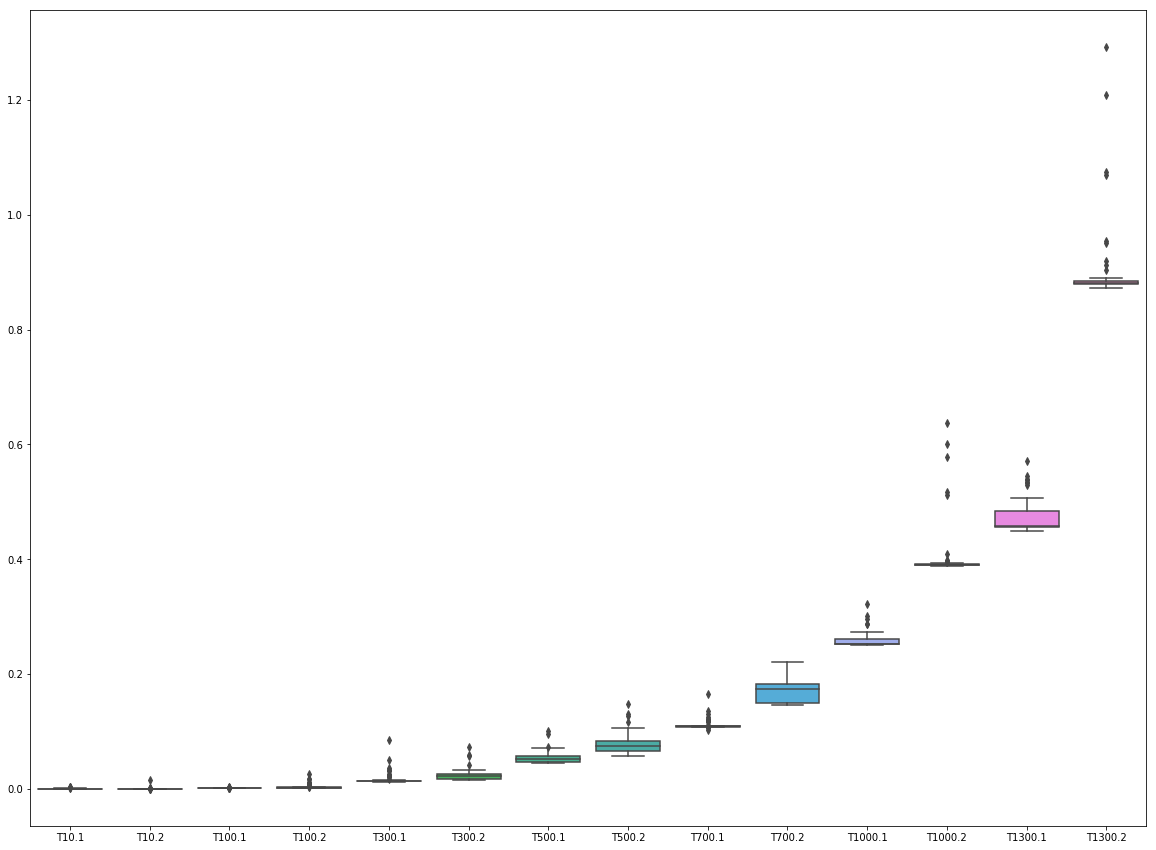

In [202]:
from matplotlib import pyplot
import seaborn as sns

fig, ax = pyplot.subplots(figsize=(20, 15))
ax = sns.boxplot(data=dfT)   

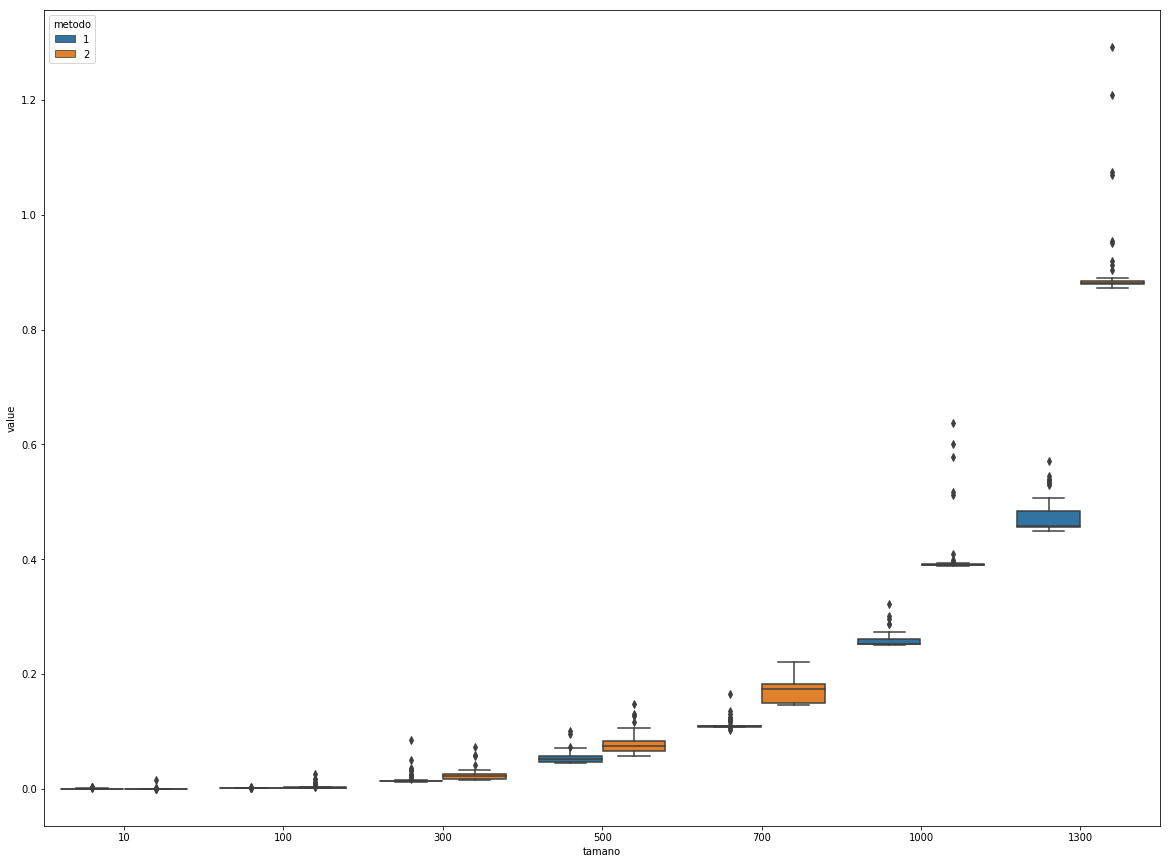

In [203]:
import pandas as pd
from matplotlib import pyplot
import seaborn as sns


df1 = pd.DataFrame(tiemposM1)
df1.index = ['T10', 'T100','T300', 'T500','T700', 'T1000','T1300']
df2 = pd.DataFrame(tiemposM2)
df2.index = ['T10', 'T100','T300', 'T500','T700', 'T1000','T1300']

df2

cdf = pd.concat([df1,df2])  
cdf = cdf.rename(columns = {50:'metodo'})
cdf = cdf.rename(columns = {51:'tamano'})
mdf = pd.melt(cdf, id_vars=['metodo','tamano'], var_name=['ejecucion'])

fig, ax = pyplot.subplots(figsize=(20, 15))
ax = sns.boxplot(x="tamano", y="value", hue="metodo", data=mdf)  

In [204]:
import string
import pandas as pd
import numpy as np
import plotly.plotly
import plotly.graph_objs as go

data = []
for col in dfT.columns:
    data.append(go.Box(y=dfT[col], name=col, showlegend=True))

config = {'editable': True}
    
data.append(go.Scatter(x=dfT.columns, y=dfT.mean(), mode='lines', name='mean',marker = dict(color='#FF4136')))
plotly.offline.iplot(data,config=config)

# Instrucciones:

* La estructura del laboratorio es la siguiente:
     1. Título, nombre de estudiante, email y rol.
     2. Introducción.
     3. Desarrollo y análisis de resultados.
     4. Conclusiones.
     5. Referencias.
* El laboratorio debe ser realizado en `Jupyter Notebook` (`Python3`).
* Se evaluará la correcta utilización de librerias `NumPy`, `SciPy`, `SymPy`, `Matplotlib` y `ipywidgets`, así como la correcta implementación de algoritmos vectorizados.
* El archivo de entrega debe denominarse Tarea1-rol.tar.gz y debe contener un directorio con todos los archivos necesarios para ejecutar el notebook, junto con un archivo README indicando explícitamente las librerías o módulos utilizados, nombre y rol del estudiante.
* El descuento por día de atraso será de $30$ puntos, con un máximo de 1 día de atraso. No se recibirán entregas después de este día.
* El trabajo es personal, no se permite compartir código ni utilizar código de otros, aunque sí se sugiere discutir aspectos generales con sus compañeros.
* En caso de sospecha de no cumplimiento de estas instrucciones, se solicitará al involucrado o la involucrada a aclarar la situación. Dependiendo de la justificación se decidirá su calificación, la cual podrá o no ser penalizada.
* El no seguir estas instrucciones, implica descuentos en su nota obtenida.

<a id='bib'></a>
## Referencias

* 1.- <a href=https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.linalg.solve.html>[1] Documentación del método *solve* de  SciPy </a>
* 2.- <a href=https://matplotlib.org/examples/pylab_examples/log_demo.html>[2] Gráficos con *semilogy* y *loglog* </a>
* 3.- <a href=https://stackoverflow.com/questions/16592222/matplotlib-group-boxplots>[3] Crear grupos de boxplots </a>